In [1]:
import numpy as np
x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn import svm
import keras

best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/MQTTset/pre_train/SVM.joblib")

model = best_svm

2024-04-16 21:53:40.696940: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:53:40.700557: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:53:40.748194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:53:41.653700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


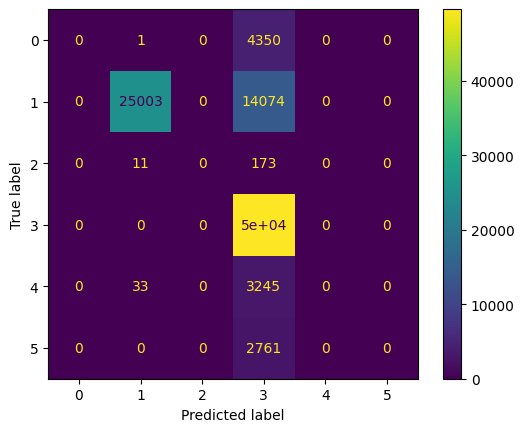

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


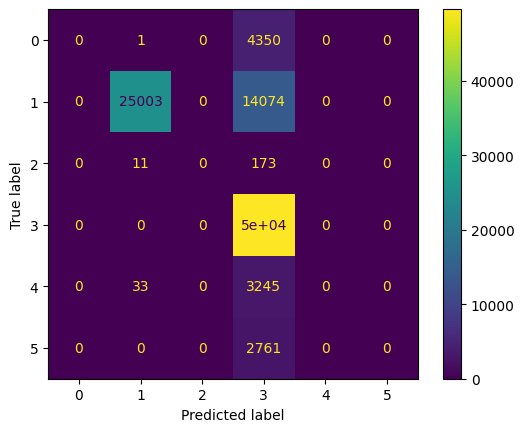

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


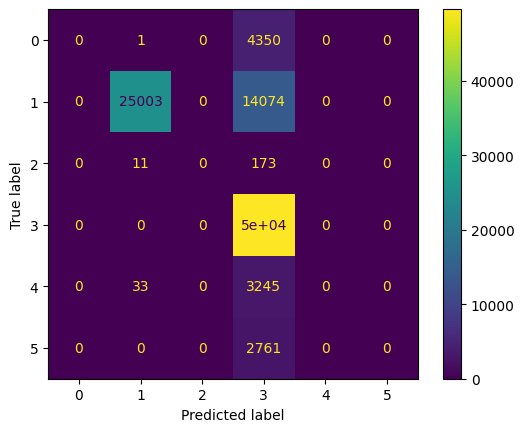

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


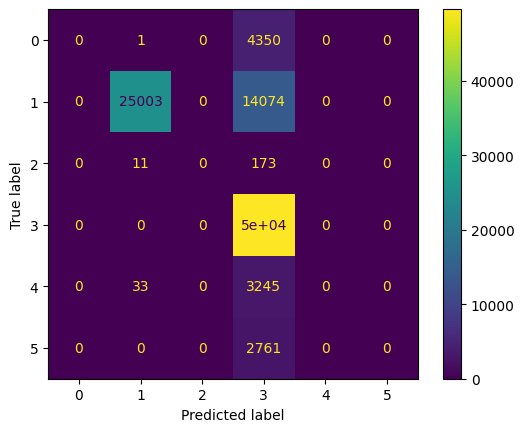

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


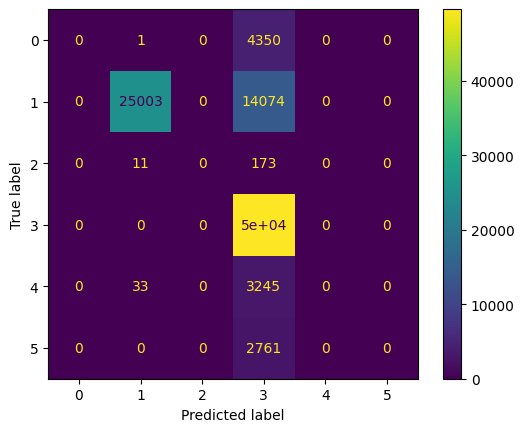

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


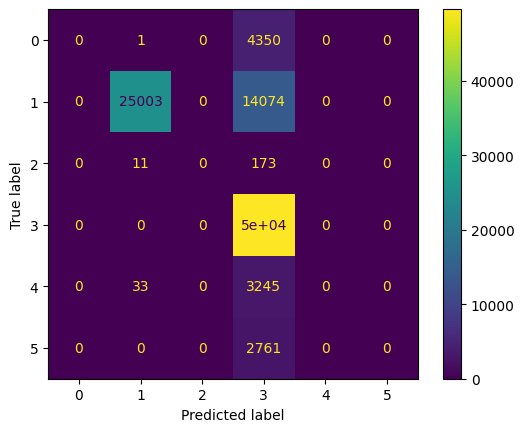

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


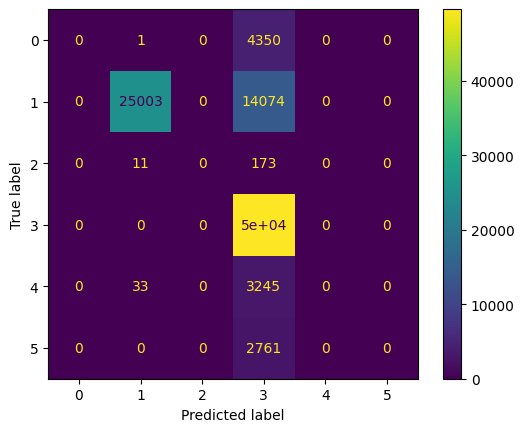

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


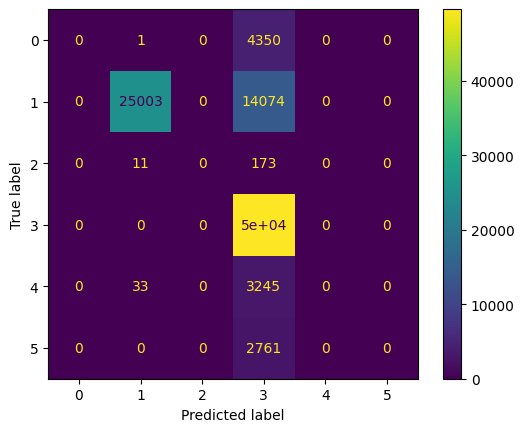

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.01
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


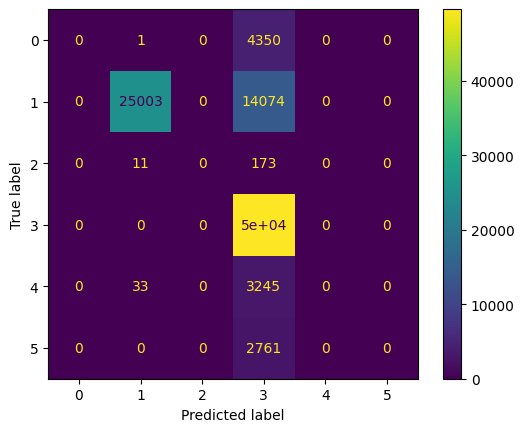

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


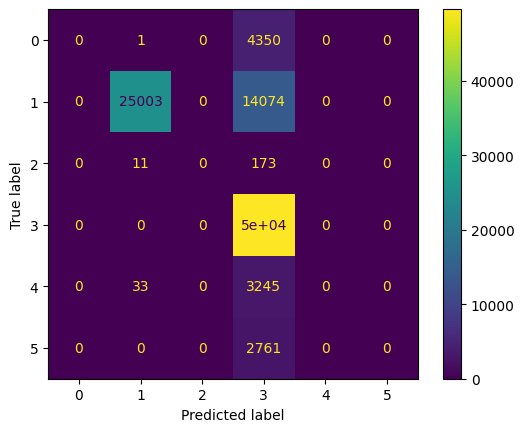

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


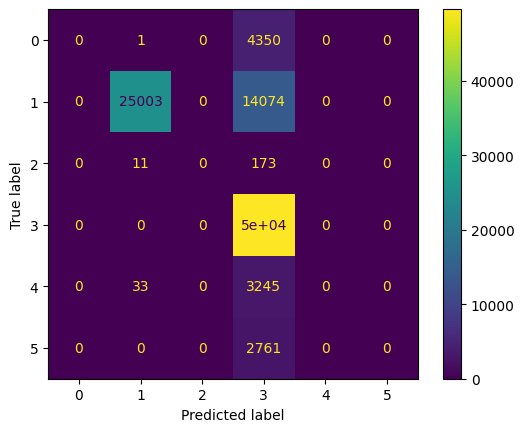

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.         0.00074735 0.         0.49551872 0.         0.        ]
TPR: [0.         0.63983929 0.         1.         0.         0.        ]
FNR: [1.         0.36016071 1.         0.         1.         1.        ]
TNR: [1.         0.99925265 1.         0.50448128 1.         1.        ]
Accuracy: 0.7517574780944707
Precision(micro,macro,weighted): 0.7517574780944707,0.2778023681309361,0.7271222245703222
F1(micro,macro,weighted: 0.7517574780944708,0.2635364631169785,0.7075602086396034
Recall(micro,macro,weighted: 0.7517574780944707,0.2733065486091563,0.7517574780944707
FPR: 0.08271101126478635
tpr: 0.2733065486091563
fnr: 0.7266934513908437
tnr: 0.9172889887352137


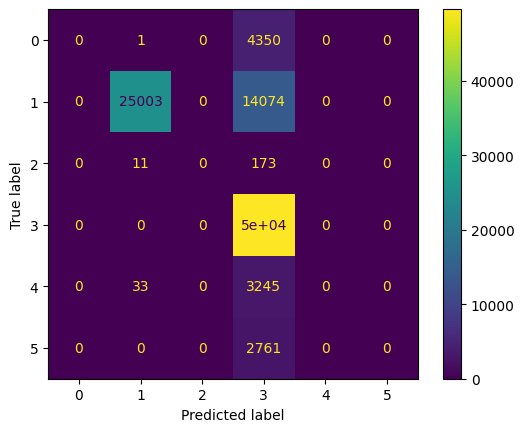

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-07
FPR: [0. 0. 0. 1. 0. 0.]
TPR: [0. 0. 0. 1. 0. 0.]
FNR: [1. 1. 1. 0. 1. 1.]
TNR: [1. 1. 1. 0. 1. 1.]
Accuracy: 0.4999395709537718
Precision(micro,macro,weighted): 0.4999395709537718,0.08332326182562863,0.24993957460544142
F1(micro,macro,weighted: 0.4999395709537718,0.11110215829914478,0.3332661921126749
Recall(micro,macro,weighted: 0.4999395709537718,0.16666666666666666,0.4999395709537718
FPR: 0.16666666666666666
tpr: 0.16666666666666666
fnr: 0.8333333333333334
tnr: 0.8333333333333334


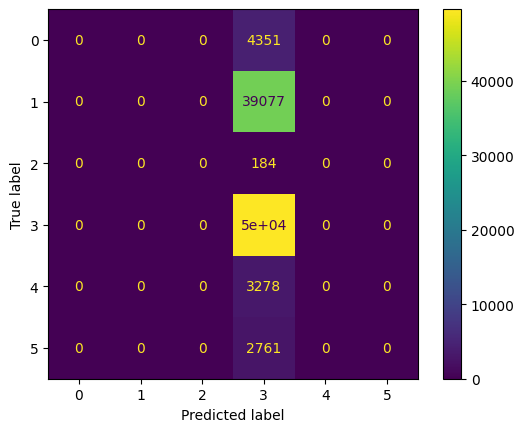

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-06
FPR: [0. 0. 0. 1. 0. 0.]
TPR: [0. 0. 0. 1. 0. 0.]
FNR: [1. 1. 1. 0. 1. 1.]
TNR: [1. 1. 1. 0. 1. 1.]
Accuracy: 0.4999395709537718
Precision(micro,macro,weighted): 0.4999395709537718,0.08332326182562863,0.24993957460544142
F1(micro,macro,weighted: 0.4999395709537718,0.11110215829914478,0.3332661921126749
Recall(micro,macro,weighted: 0.4999395709537718,0.16666666666666666,0.4999395709537718
FPR: 0.16666666666666666
tpr: 0.16666666666666666
fnr: 0.8333333333333334
tnr: 0.8333333333333334


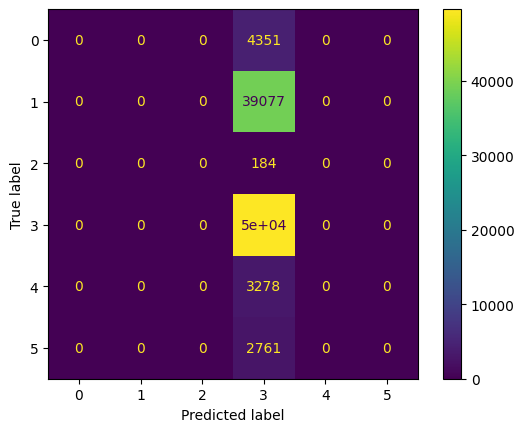

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 1e-05
FPR: [0. 0. 0. 1. 0. 0.]
TPR: [0. 0. 0. 1. 0. 0.]
FNR: [1. 1. 1. 0. 1. 1.]
TNR: [1. 1. 1. 0. 1. 1.]
Accuracy: 0.4999395709537718
Precision(micro,macro,weighted): 0.4999395709537718,0.08332326182562863,0.24993957460544142
F1(micro,macro,weighted: 0.4999395709537718,0.11110215829914478,0.3332661921126749
Recall(micro,macro,weighted: 0.4999395709537718,0.16666666666666666,0.4999395709537718
FPR: 0.16666666666666666
tpr: 0.16666666666666666
fnr: 0.8333333333333334
tnr: 0.8333333333333334


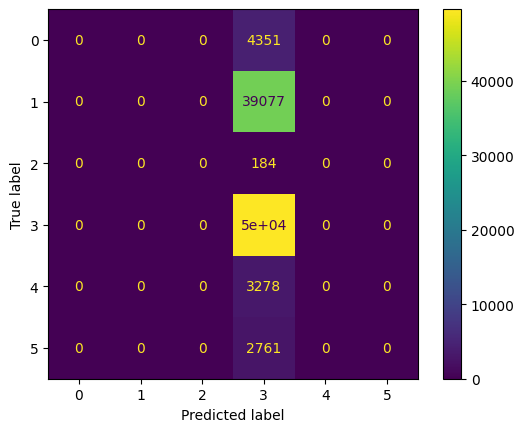

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.0001
FPR: [0. 0. 0. 1. 0. 0.]
TPR: [0. 0. 0. 1. 0. 0.]
FNR: [1. 1. 1. 0. 1. 1.]
TNR: [1. 1. 1. 0. 1. 1.]
Accuracy: 0.4999395709537718
Precision(micro,macro,weighted): 0.4999395709537718,0.08332326182562863,0.24993957460544142
F1(micro,macro,weighted: 0.4999395709537718,0.11110215829914478,0.3332661921126749
Recall(micro,macro,weighted: 0.4999395709537718,0.16666666666666666,0.4999395709537718
FPR: 0.16666666666666666
tpr: 0.16666666666666666
fnr: 0.8333333333333334
tnr: 0.8333333333333334


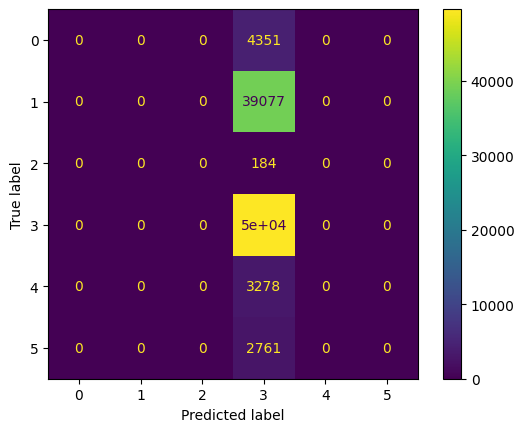

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/MQTTset/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)